### I want to implement linear regression from scratch

In some examples people usually implement predicting houses prices
In my case I want to predict car prices according to
- `car mileage`
- `year of car manufacture`
- `car model`
- etc

In [2]:
# importing libs
import numpy as np
import matplotlib.pyplot as plt

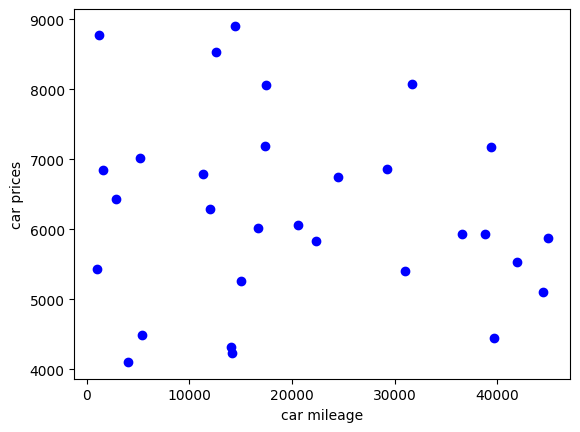

In [7]:
# get data | btw its all random 'cause im lazy
rng = np.random.default_rng(123456)
car_prices = rng.integers(low=4000, high=9000, size=30)
car_mileage = rng.integers(low=100, high=50000, size=30)

plt.plot(car_mileage, car_prices, 'bo')
plt.xlabel('car mileage')
plt.ylabel('car prices')
plt.show()

Right now we have arrays `car_mileage` which refers to x (or, feature variable)
and `car_price` which refers to y (or, target variable)

This is called training set (dataset)

We have to move our dataset through learning algorithm which is some function `f` (it is also called `model`).

What will be our function `f` mathematically look like? Let's take a look below

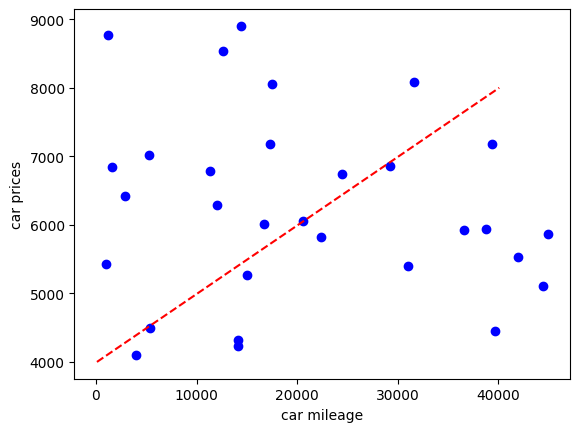

Red line is simple linear function which is kind of mean of values. So we want to pick up such line so it fits the data and we could predict the values

And mathematically it looks like `f(x)=wx + b`

What are `w` and `b` numbers? It is called _parameters_. Also `w` is called _weight_ and `b` is called _bias_

So to pick up best fitting line to our data we have to find values `w` and `b`

### If you are unfamiliar with linear function, this section is for you

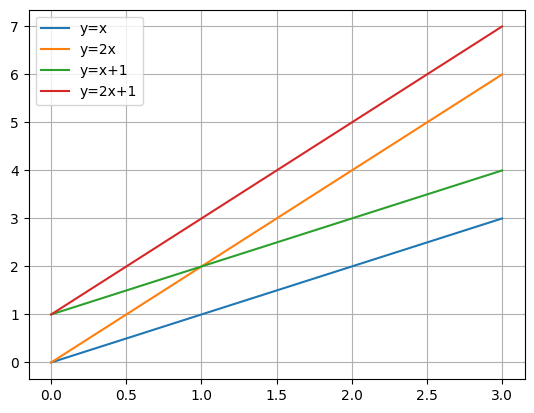

As you can see parameter `w` before `x` is changing slope of a line while `b` set the starting height of a line

So changing `w` and `b` we can find best fitting line for our data. The question is _"How we find these parameters?"_